In [26]:
from shapely.geometry import Point, Polygon
import shapely.geometry as geom
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster
import statistics

In [27]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [28]:
print(zipcodes.crs)
(zipcodes.head())

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [29]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

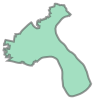

In [30]:
zipcodes.loc[0, 'geometry']

<AxesSubplot:>

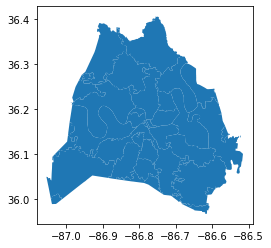

In [31]:
zipcodes.plot()

<AxesSubplot:>

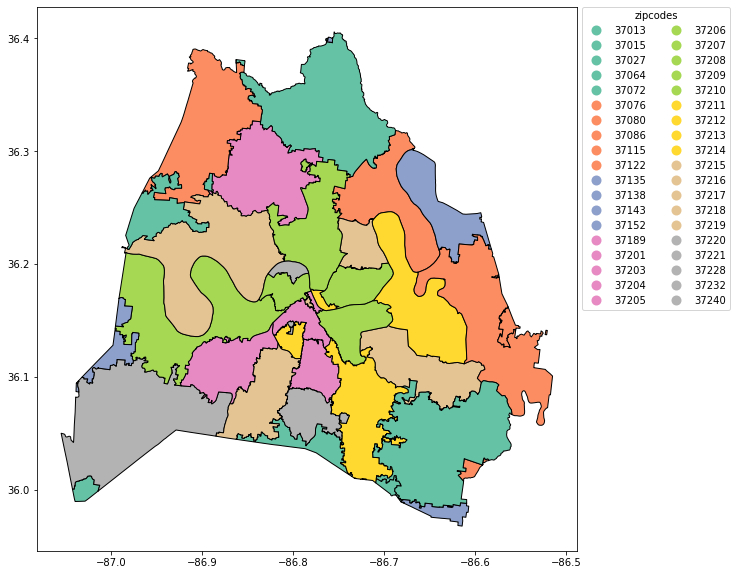

In [32]:
leg_kwds = {'title': 'zipcodes', 'ncol': 2,
           'loc': 'upper left', 'bbox_to_anchor' : (1,1.01)}
zipcodes.plot(column='zip', figsize=(10,10), 
              edgecolor='black', legend=True, cmap = 'Set2', legend_kwds = leg_kwds)

In [36]:
water_df = gpd.read_file('../data/water_fountain_and_hydration_system.geojson')

In [37]:
(water_df)

,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)
...,...,...,...,...,...,...,...,...,...,...
68,Harpeth River Greenway,Morton Mill Rd at Old Harding Pike,Y,0,36.05899273,N,1,-86.94508441,Standard/ADA/Bottle Filler,POINT (-86.94508 36.05899)
69,Harpeth River Greenway,Butler Field Trail Head,Y,0,36.05133033,N,1,-86.91617134,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133)
70,River Landing,Greenway @ Victory & Titans Ways,N,0,36.16412161,Y,1,-86.77223047,Standard/ADA,POINT (-86.77223 36.16412)
71,Ascend Amphiteater Water Fountain,Building,N,0,36.16014227,N,1,-86.77120998,Standard/ADA/Bottle Filler,POINT (-86.77121 36.16014)


In [38]:
type(water_df)

geopandas.geodataframe.GeoDataFrame

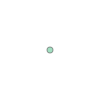

In [39]:
water_df.loc[0,'geometry']

In [40]:
print(water_df.loc[0,'geometry'])

POINT (-86.89425345576078 36.26250455840148)


<AxesSubplot:>

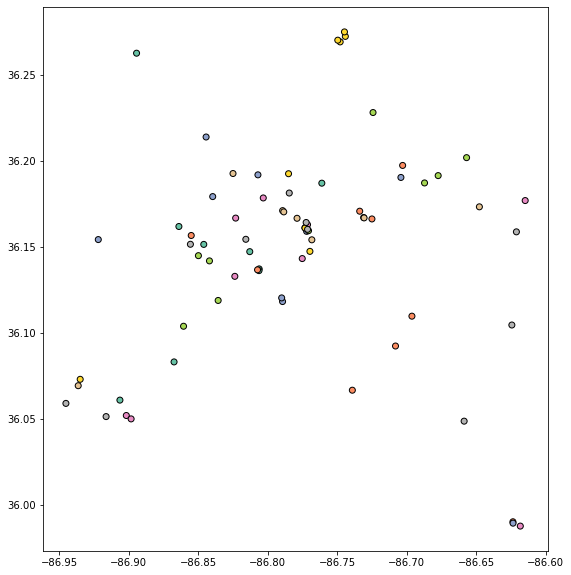

In [41]:

water_df.plot(figsize=(10,10), edgecolor='black',cmap='Set2')

In [42]:
water_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

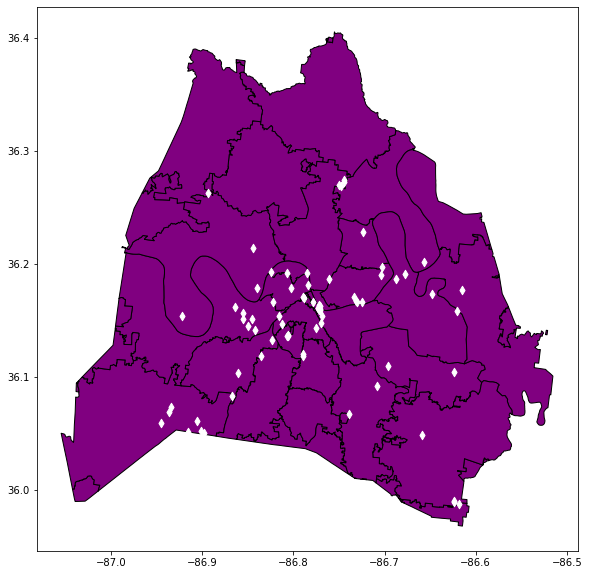

In [43]:
ax = zipcodes.plot(figsize=(10,10), color = 'purple', edgecolor = 'black')
ax1 = water_df.plot(ax=ax, color = 'white', marker = 'd')
plt.savefig("High resoltion.png",dpi=300)


In [44]:
water_zip = gpd.sjoin(water_df, zipcodes, op = 'within')

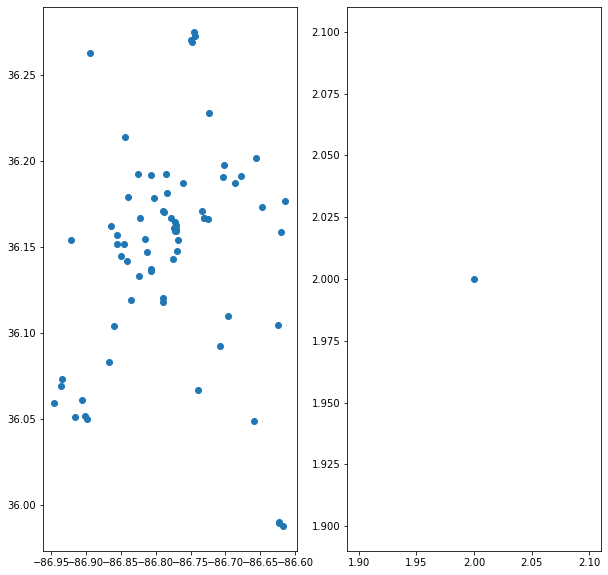

In [91]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.scatter(water_df.geometry.x, water_df.geometry.y)
ax2.scatter(2,2)

In [46]:
a = water_zip['zip'].value_counts()[water_zip['zip'].value_counts() == water_zip['zip'].value_counts().max()].index

In [20]:
water_zip[water_zip['zip'].isin(a)]

,name,location,dog,objectid_left,lon,ada,cnt,lat,feat_type,geometry,index_right,zip,objectid_right,po_name,shape_stlength,shape_starea
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
29,Edwin Warner Dog Park Water Fountain,Dog Park,Y,46595,36.05195562,N,1,-86.90162012,Dog Only,POINT (-86.90162 36.05196),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
30,Edwin Warner Concession Water Fountain,WNSL Concessions,N,46597,36.04998346,Y,1,-86.8981744,Standard/ADA,POINT (-86.89817 36.04998),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
47,Bellevue Park Water Fountain,Restrooms,N,46636,36.07298516,Y,1,-86.93480989,Fountain/Bottle filler/ADA,POINT (-86.93481 36.07299),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
59,Bellevue Library Hydration System,None,Y,0,36.069282,Y,1,-86.93623588,Fountain/Bottle filler/ADA,POINT (-86.93624 36.06928),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
68,Harpeth River Greenway,Morton Mill Rd at Old Harding Pike,Y,0,36.05899273,N,1,-86.94508441,Standard/ADA/Bottle Filler,POINT (-86.94508 36.05899),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
69,Harpeth River Greenway,Butler Field Trail Head,Y,0,36.05133033,N,1,-86.91617134,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456


In [47]:
center = [statistics.mean(zipcodes.geometry.centroid.y),statistics.mean(zipcodes.geometry.centroid.x)]

/var/folders/cs/sydn43ms0gj7rn95h4d8nvrw0000gn/T/ipykernel_26140/3977816614.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [statistics.mean(zipcodes.geometry.centroid.y),statistics.mean(zipcodes.geometry.centroid.x)]


In [115]:
water_zip = water_zip.rename(columns={'long': 'lon'})

In [279]:
map = folium.Map(location=center, zoom_start=10)
folium.GeoJson(zipcodes.geometry).add_to(map)


marker_cluster = MarkerCluster().add_to(map)
for lab,row in water_zip.iterrows():
    loc = [row.geometry.y, row.geometry.x]
 
    fname = str(row['name'])
    HTML_File=open('index.html','r')
    s = HTML_File.read().format(fname = fname, bname =str(row['location']) )
    
    if(str(row['location']).find('out of')!=-1):
        c='black'
        i = folium.Icon( icon = 'fa-times', prefix = 'fa', color=c)
    else:
        c='blue'
        i = folium.Icon( icon = 'fa-tint', prefix = 'fa', color=c)



    pop = folium.Popup( s ,max_width = 200, min_height = 300)

   # folium.Marker(location = loc, popup = pop, icon = icon).add_to(map)
    folium.Marker(location = loc, popup = pop, icon = i).add_to(marker_cluster)

map
map.save('map.html')